# Sentiment Analysis on Yelp review data

The purpose of this Jupyter Notebook is to demonstrate how to perform sentiment analysis in Python using two distinct techniques: VADER, a valence-based approach that relies on a predefined dictionary of words, and the Roberta Pretrained Model from Hugging Face, which utilizes a deep learning-based approach.

The first technique, VADER, takes a "bag of words" approach to sentiment analysis. It uses a predefined dictionary of words that have been assigned scores based on their positive or negative sentiment. The algorithm then calculates a compound score for the entire text, which is a normalized weighted sum of the scores of individual words.

The second technique, the Roberta Pretrained Model, is based on a deep learning algorithm that has been trained on a large corpus of text data. This approach requires a model that has been pre-trained on a large dataset, such as the one provided by Hugging Face, to classify the sentiment of a given text.

The notebook is concluded, with the comparison of both models against the actual score given to the Yelp reviews.

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re




plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#Extracting Yelp data

In [ ]:
url = 'https://www.yelp.com/biz/burgermeister-berlin?osq=Restaurants'




reviews = []
star_ratings = []
dates = []

for i in range(1, 3):
    params = {'start': i}
    r = requests.get(url, params=params)
    soup = BeautifulSoup(r.text, 'html.parser')
    # Extract the reviews
    
            
    regex = re.compile('.*comment.*')
    results = soup.find_all('p', {'class': regex})
    for result in results:
        reviews.append(result.text)
    # Extract the star ratings
    star_rating_tags = soup.find_all('div', {'aria-label': True, 'class': 'five-stars__09f24__mBKym'})

    star_counts = ['1 star rating', '1.5 star rating', '2 star rating', '2.5 star rating', '3 star rating', 
               '3.5 star rating', '4 star rating', '4.5 star rating', '5 star rating']

    # Iterate through the elements and check if the aria-label attribute of the element is an exact match with a possible star count
    for tag in star_rating_tags[2:-1]:
        if tag['aria-label'] in star_counts:
            star_ratings.append(tag['aria-label'])
    

    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    date_tags = soup.find_all('span', class_='css-chan6m')
    for tag in date_tags:
        date = tag.text
        date_format = re.match(r'\d{1,2}/\d{1,2}/\d{4}', date)
        if date_format:
                dates.append(date)

## Creating the dataframe

In [ ]:
df = pd.DataFrame(np.array(reviews), columns=['review'])
df['star_count'] = star_ratings
df['comment_date'] = dates
df['ID'] = range(1, len(df) + 1)
df['star_count'] = df['star_count'].str.replace(r'\D', '')



<ipython-input-81-7186c25dc3a4>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['star_count'] = df['star_count'].str.replace(r'\D', '')


In [ ]:
df.head()

,review,star_count,comment_date,ID
0,This was a random place we found on Google whe...,5,1/7/2023,1
1,This was a solid burger but the fries tasted l...,3,10/25/2022,2
2,This is such a cool idea. I read the entire st...,4,12/19/2022,3
3,Every one of our Berlin friends recommended th...,3,7/12/2020,4
4,I wasn't expecting this to be a gem!Cast iron ...,5,8/8/2022,5


## Overview

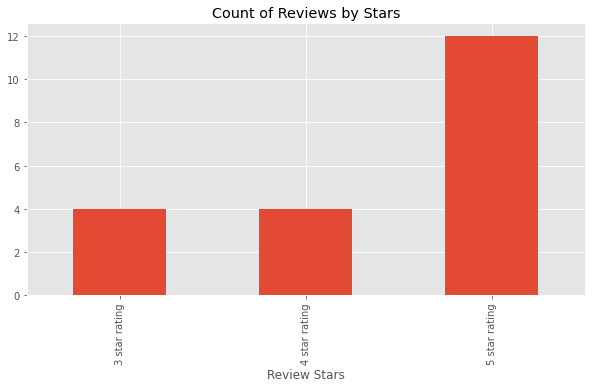

In [ ]:
ax = df['star_count'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
df['star_count'] = pd.to_numeric(df['star_count'].str[0], errors='coerce')
df = df.dropna(subset=['star_count'])

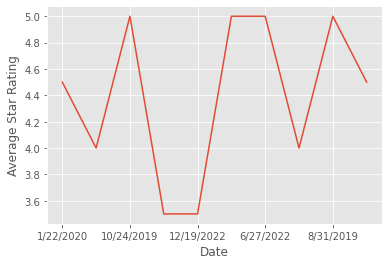

In [ ]:
df.groupby(['comment_date'])['star_count'].mean().plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Average Star Rating')
plt.show()


## Basic NLTK

In [ ]:
example = df['review'][10]
print(example)

This was a solid burger but the fries tasted like they had been sitting out for a long time. The tables in the restaurant were also pretty dirty.


In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This',
 'was',
 'a',
 'solid',
 'burger',
 'but',
 'the',
 'fries',
 'tasted',
 'like']

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('solid', 'JJ'),
 ('burger', 'NN'),
 ('but', 'CC'),
 ('the', 'DT'),
 ('fries', 'NNS'),
 ('tasted', 'VBN'),
 ('like', 'IN')]

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  was/VBD
  a/DT
  solid/JJ
  burger/NN
  but/CC
  the/DT
  fries/NNS
  tasted/VBN
  like/IN
  they/PRP
  had/VBD
  been/VBN
  sitting/VBG
  out/RP
  for/IN
  a/DT
  long/JJ
  time/NN
  ./.
  The/DT
  tables/NNS
  in/IN
  the/DT
  restaurant/NN
  were/VBD
  also/RB
  pretty/RB
  dirty/NN
  ./.)


#VADER Seniment Scoring using bag of words approach


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
sia.polarity_scores(example)

{'neg': 0.111, 'neu': 0.634, 'pos': 0.255, 'compound': 0.6124}

In [ ]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review']
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/20 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(df, how='left')

In [ ]:

vaders.head()

,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,review,star_count,comment_date
0,1,0.000,0.734,0.266,0.9898,0.002163,0.025296,0.972542,This was a random place we found on Google whe...,5,1/7/2023
1,2,0.111,0.634,0.255,0.6124,0.896115,0.091964,0.011920,This was a solid burger but the fries tasted l...,3,10/25/2022
2,3,0.025,0.815,0.160,0.9626,0.003211,0.039418,0.957371,This is such a cool idea. I read the entire st...,4,12/19/2022
3,4,0.000,0.676,0.324,0.9524,0.002341,0.030725,0.966933,Every one of our Berlin friends recommended th...,3,7/12/2020
4,5,0.025,0.821,0.154,0.8881,0.005028,0.043381,0.951591,I wasn't expecting this to be a gem!Cast iron ...,5,8/8/2022


## Visualization

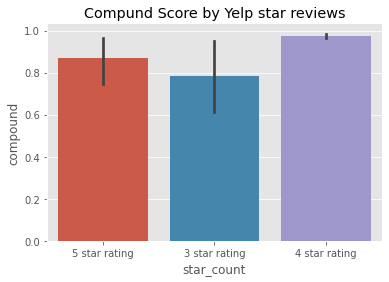

In [ ]:
ax = sns.barplot(data=vaders, x='star_count', y='compound')
ax.set_title('Compund Score by Yelp star reviews')
plt.show()

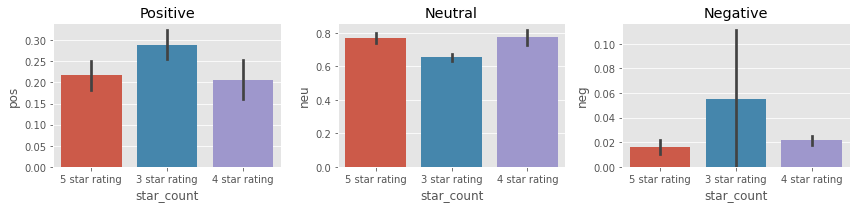

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='star_count', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='star_count', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='star_count', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

#Roberta Model

- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words.

In [ ]:

!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/torch_stable.html
!pip install transformers 
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 487.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu116
    Uninstalling torchvision-0.14.1+cu116:
      Successfully uninstalled torchvision-0.14.1+cu116
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.13.1+cu116
    Uninstalling torchaudio-0.13.1+cu116:
      Successfully uninstalled torchaudio-0.13.1+cu116
ERROR: pip's dependency resolver does not

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
# VADER results on example
print(example)
sia.polarity_scores(example)

This was a solid burger but the fries tasted like they had been sitting out for a long time. The tables in the restaurant were also pretty dirty.


{'neg': 0.111, 'neu': 0.634, 'pos': 0.255, 'compound': 0.6124}

In [ ]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.8961153, 'roberta_neu': 0.09196437, 'roberta_pos': 0.0119202705}


In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['review']
        myid = row['ID']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/20 [00:00<?, ?it/s]

Broke for id 20


In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'ID'})
results_df = results_df.merge(df, how='left')

## Comparing Scores between models

In [ ]:
results_df.head()

,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,review,star_count,comment_date
0,1,0.000,0.734,0.266,0.9898,0.002163,0.025296,0.972542,This was a random place we found on Google whe...,5,1/7/2023
1,2,0.111,0.634,0.255,0.6124,0.896115,0.091964,0.011920,This was a solid burger but the fries tasted l...,3,10/25/2022
2,3,0.025,0.815,0.160,0.9626,0.003211,0.039418,0.957371,This is such a cool idea. I read the entire st...,4,12/19/2022
3,4,0.000,0.676,0.324,0.9524,0.002341,0.030725,0.966933,Every one of our Berlin friends recommended th...,3,7/12/2020
4,5,0.025,0.821,0.154,0.8881,0.005028,0.043381,0.951591,I wasn't expecting this to be a gem!Cast iron ...,5,8/8/2022


In [ ]:
results_df.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'review', 'star_count',
       'comment_date'],
      dtype='object')

#Combined comparison

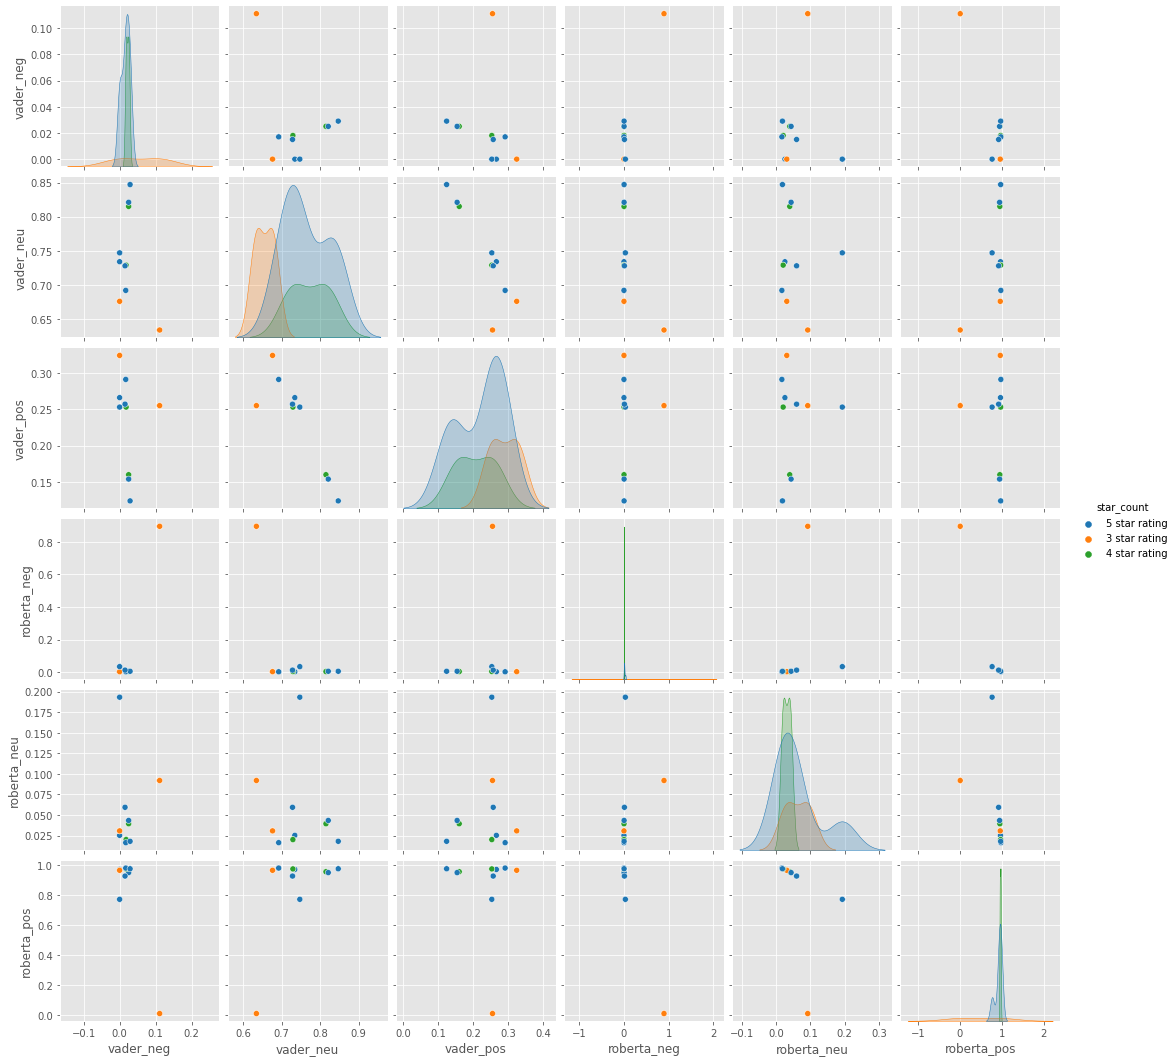

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='star_count',
            palette='tab10')
plt.show()

# The End